# Lecture 4 & 5 -- Introduction to Data & Pandas
In this lecture, students will learn about how to work with data and use the most popular data analysis and manipulation library, `pandas`. This is one of a few lectures on `pandas` and related concepts. In this particular lecture, we cover the following topics among others.
- Basic Pandas functionality
- Pandas data types
- Key methods for Pandas data types
- Saving and loading data
- Data cleaning
- Reshaping
- Merging
- Grouping and Aggregating
- Time series data

This lecture follows QuantEcon's lecture on [Pandas](https://datascience.quantecon.org/pandas/index.html) more so than previous lectures and uses many of the same examples and code. Note that Pandas has a lot of functionality, and we cannot cover it all in this lecture. This lecture should provide you with a good foundation to learn more on your when the time comes. 

If you need to look at the detail of a specific function, visit the [Pandas documentaiton](https://pandas.pydata.org/docs/). If you have a question or 

In [1]:
 # %pip install quandl for installing quandl

## Importing `pandas`
Below we import `pandas` using its common alias `pd`.

In [2]:
import pandas as pd
import quandl # use this to load dataset later

## Series
`pandas` has a data type called series. A series is a single column of data. Series, however, allow for custom indices. For instance, below we define a series that contains the winning NBA team for each year from 2010 to 2022.

In [3]:
team_names = ["Lakers", "Mavericks", "Heat", "Heat", "Spurs", "Warriors", "Cavaliers",
         "Warriors", "Warriors", "Raptors", "Lakers", "Bucks", "Warriors"]
years = list(range(2010,2023))

nba = pd.Series(data = team_names, index = years, name = "NBA Finals Champions")
print(nba)

2010       Lakers
2011    Mavericks
2012         Heat
2013         Heat
2014        Spurs
2015     Warriors
2016    Cavaliers
2017     Warriors
2018     Warriors
2019      Raptors
2020       Lakers
2021        Bucks
2022     Warriors
Name: NBA Finals Champions, dtype: object


### Series Indexing
Indexing works much like lists except for now, we have to use the indicies we provided to `pd.Series`:

In [4]:
print(f"The winners of the 2012 NBA finals were the {nba[2012]}.")
print(nba[[2012, 2014, 2016]]) # Print a subseries

The winners of the 2012 NBA finals were the Heat.
2012         Heat
2014        Spurs
2016    Cavaliers
Name: NBA Finals Champions, dtype: object


Like a dictionary, we can reextract a list of the indices and values using `.index` and `.values` respectively.  

In [5]:
print(nba.index)
print(nba.values)

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
            2021, 2022],
           dtype='int64')
['Lakers' 'Mavericks' 'Heat' 'Heat' 'Spurs' 'Warriors' 'Cavaliers'
 'Warriors' 'Warriors' 'Raptors' 'Lakers' 'Bucks' 'Warriors']


### Series Methods
Series objects have methods, some of which we demonstrate below. `

In [6]:
print(nba.head(3)) # prints first three entries

2010       Lakers
2011    Mavericks
2012         Heat
Name: NBA Finals Champions, dtype: object


In [7]:
print(nba.tail())  # prints last five entries by default

2018    Warriors
2019     Raptors
2020      Lakers
2021       Bucks
2022    Warriors
Name: NBA Finals Champions, dtype: object


In [8]:
nba.unique() # returns a list of all teams that won at least once

array(['Lakers', 'Mavericks', 'Heat', 'Spurs', 'Warriors', 'Cavaliers',
       'Raptors', 'Bucks'], dtype=object)

### Series Plots
We can also easily plot series using methods! Below, we define a series of containing the annual US unemployment rate (example from [QuantEcon](https://datascience.quantecon.org/pandas/intro.html))

<AxesSubplot:>

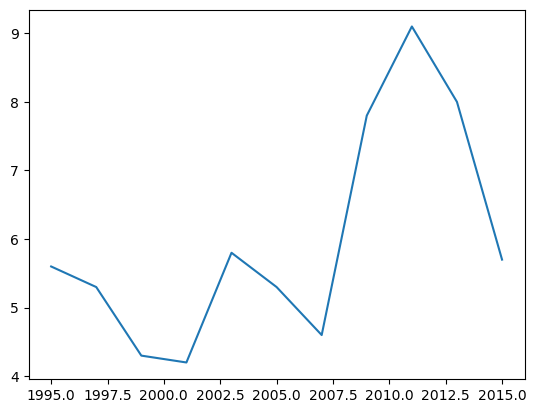

In [9]:
values = [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
years = list(range(1995, 2017, 2))
unemp = pd.Series(data=values, index=years, name="Unemployment")
unemp.plot()

## DataFrames
A DataFrame is a table of data -- you can think of a DataFrame as many series stacked side-by-side. This data structure is very similar to the tabular data you might see in an Excel sheet. 

Like series, DataFrames have row indices, but they also have column labels or names. Having two set of indices allows us to refer to individual columns or rows when needed. 

Below, we define a DataFrame of unemployment rates for various regions in the US (example from [QuantEcon](https://datascience.quantecon.org/pandas/intro.html))

In [10]:
data = {
    "NorthEast": [5.9,  5.6,  4.4,  3.8,  5.8,  4.9,  4.3,  7.1,  8.3,  7.9,  5.7],
    "MidWest": [4.5,  4.3,  3.6,  4. ,  5.7,  5.7,  4.9,  8.1,  8.7,  7.4,  5.1],
    "South": [5.3,  5.2,  4.2,  4. ,  5.7,  5.2,  4.3,  7.6,  9.1,  7.4,  5.5],
    "West": [6.6, 6., 5.2, 4.6, 6.5, 5.5, 4.5, 8.6, 10.7, 8.5, 6.1],
    "National": [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
}
years = list(range(1995, 2017, 2))

unemp_region = pd.DataFrame(data, index=years)
unemp_region

,NorthEast,MidWest,South,West,National
1995,5.9,4.5,5.3,6.6,5.6
1997,5.6,4.3,5.2,6.0,5.3
1999,4.4,3.6,4.2,5.2,4.3
2001,3.8,4.0,4.0,4.6,4.2
2003,5.8,5.7,5.7,6.5,5.8
2005,4.9,5.7,5.2,5.5,5.3
2007,4.3,4.9,4.3,4.5,4.6
2009,7.1,8.1,7.6,8.6,7.8
2011,8.3,8.7,9.1,10.7,9.1
2013,7.9,7.4,7.4,8.5,8.0


### DataFrame Indexing
Indexing dataframes requires use of `.loc` as shown below

In [11]:
ne_1995 = unemp_region.loc[1995, "NorthEast"]
print(f"The 1995 Unemployment Rate for the North East Region is {ne_1995}%")


The 1995 Unemployment Rate for the North East Region is 5.9%


In [12]:
unemp_region.loc[[1995, 2005], "South"] # Multiple at once

1995    5.3
2005    5.2
Name: South, dtype: float64

In [13]:
unemp_region["MidWest"] # extracts whole column, doesn't need to use .loc

1995    4.5
1997    4.3
1999    3.6
2001    4.0
2003    5.7
2005    5.7
2007    4.9
2009    8.1
2011    8.7
2013    7.4
2015    5.1
Name: MidWest, dtype: float64

### Column Computations
We can do computations with columns of a DataFrame. First let's see what type a column of a DataFrame has and try some computations out.

In [14]:
type(unemp_region["MidWest"])
# Can divide columns if they are numerical

print(unemp_region["West"] / 100) # turn percentage to proportion

print(unemp_region["West"] - unemp_region["MidWest"]) # can subtract columns


1995    0.066
1997    0.060
1999    0.052
2001    0.046
2003    0.065
2005    0.055
2007    0.045
2009    0.086
2011    0.107
2013    0.085
2015    0.061
Name: West, dtype: float64
1995    2.1
1997    1.7
1999    1.6
2001    0.6
2003    0.8
2005   -0.2
2007   -0.4
2009    0.5
2011    2.0
2013    1.1
2015    1.0
dtype: float64


### Data Types
We've seen that Series and DataFrames can contain numbers or strings. Using `.dtype` on a series of `.dtypes` on a DataFrames tells us the datatype of each column. DataFrames have a few types:
- Booleans
- Floating point numbers
- Integers
- Dates
- Categorical Data
- Everything else (objects)

In [15]:
print(unemp.dtype)
print(nba.dtype) # strings are generic objects in Pandas

float64
object


In [16]:
print(unemp_region.dtypes)

NorthEast    float64
MidWest      float64
South        float64
West         float64
National     float64
dtype: object


### Creating New Columns
If `df` is a dataframe, we can create a new column by simply writing
`df["New Column Name"] = new_values` where `new_values` has the same number of elements as `df` has rows. Below, we create an average of all region's unemployment rates.

In [17]:
unemp_region["UnweightedMean"] = (unemp_region["NorthEast"] +
                                  unemp_region["MidWest"] +
                                  unemp_region["South"] +
                                  unemp_region["West"])/4
unemp_region.head()

,NorthEast,MidWest,South,West,National,UnweightedMean
1995,5.9,4.5,5.3,6.6,5.6,5.575
1997,5.6,4.3,5.2,6.0,5.3,5.275
1999,4.4,3.6,4.2,5.2,4.3,4.350
2001,3.8,4.0,4.0,4.6,4.2,4.100
2003,5.8,5.7,5.7,6.5,5.8,5.925


### Changing Individual Values
It is somewhat inefficient to change individual vaues of a DataFrame, but it can be done using `.loc`

In [18]:
unemp_region.loc[1995, "UnweightedMean"] = 0.0
unemp_region.head()

,NorthEast,MidWest,South,West,National,UnweightedMean
1995,5.9,4.5,5.3,6.6,5.6,0.000
1997,5.6,4.3,5.2,6.0,5.3,5.275
1999,4.4,3.6,4.2,5.2,4.3,4.350
2001,3.8,4.0,4.0,4.6,4.2,4.100
2003,5.8,5.7,5.7,6.5,5.8,5.925


## Renaming Columns
To rename columns, we firs tmus define a dictionary where the old column names we want to replace are the keys of the dictionary and the new column names are the values. Then, we use the DataFrame method `.rename()`. `.rename` does not replace the column names, it create a copy of the dataframe with the new column names, so you need to assign your dataframe to the output of `.rename()` or use the option `inplace = True`.


Below, we rename all region columns to abbreviated names. 

Then, we 

In [19]:
names = {"NorthEast": "NE",
         "MidWest": "MW",
         "South": "S",
         "West": "W"}
unemp_region.rename(columns=names)
print(unemp_region.head())


unemp_region  = unemp_region.rename(columns=names)
print(unemp_region.head())

      NorthEast  MidWest  South  West  National  UnweightedMean
1995        5.9      4.5    5.3   6.6       5.6           0.000
1997        5.6      4.3    5.2   6.0       5.3           5.275
1999        4.4      3.6    4.2   5.2       4.3           4.350
2001        3.8      4.0    4.0   4.6       4.2           4.100
2003        5.8      5.7    5.7   6.5       5.8           5.925
       NE   MW    S    W  National  UnweightedMean
1995  5.9  4.5  5.3  6.6       5.6           0.000
1997  5.6  4.3  5.2  6.0       5.3           5.275
1999  4.4  3.6  4.2  5.2       4.3           4.350
2001  3.8  4.0  4.0  4.6       4.2           4.100
2003  5.8  5.7  5.7  6.5       5.8           5.925


## Loading Data
It would be wildly inefficient if we had to define DataFrames manually, especially when dealing with massive datasets. Luckily, we can load data from our computers or from a URL using the `pd.read_csv()`. below, we load monthly state-level unemployment data from a URL. If we were loading fom our computer, we would replace the url with a local file path.

In [20]:
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])
unemp_raw.head(3)

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1


`read_csv` will automatically try and determine what datatype each column is. With this particular dataset, Pandas needs a little help, so we let it know the column "Date" should be interpreted as a date data type. 

## Quick Data Manipulation
We are going to quickly manipulate the data we loaded, so we can illustrate more examples. Do not worry about understanding how the code below works. We will discuss that more later. Let's just talk about how the data looks after we do it. 

In [21]:
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)

states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas", "Colorado"
]
unemp = unemp_all[states]

unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas,Colorado
Date,,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6,2.8
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6,2.8
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5,2.7
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4,2.7
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3,2.7


## What Changed?
We've manipulated the data so every row is a month (month is now the row index) and every column is a state. Each entry is the unemployment rate of that state in the given month.  Since every entry is a number, we can use the plot method on the whole DataFrame!

<AxesSubplot:xlabel='Date'>

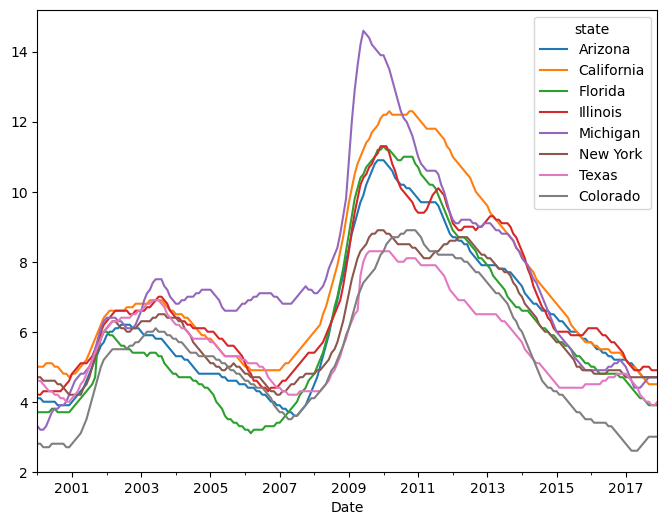

In [22]:
unemp.plot(figsize=(8, 6))

## New Indices
Now our data is indexed by dates! Let's try and access all unemployment rates on 2015-01-01.

In [23]:
#print(unemp.loc["01/01/2015", :])
unemp.loc["01/01/2015":"03/01/2015", :]# we can also view many dates at once.

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas,Colorado
Date,,,,,,,,
2015-01-01,6.4,6.8,5.8,6.0,6.0,5.7,4.5,4.3
2015-02-01,6.3,6.7,5.7,6.0,5.9,5.7,4.4,4.2
2015-03-01,6.3,6.6,5.7,6.0,5.8,5.6,4.4,4.2


## DataFrame Aggregations
Simply put, aggregation is simply an operation that combines multiple values into a single value. One example of this is an average -- an average takes a collection of numbers (e.g. `[1, 2, 4, 5]`) and returns its average (e.g. 3). 

Pandas has many built-in aggregations such as:
- Mean/Average (`mean`)
- Mode (`mode`)
- Median (`median`)
- Maximum (`max`)

among others. 

For instance, we can see what Colorado's median and maximum unemployment rate was. 

In [24]:
co_unemp = unemp_raw.loc[unemp_raw.state == "Colorado",:]

co_unemp["UnemploymentRate"].median()
co_unemp.UnemploymentRate.max()

8.9

### Custom Aggregations
Using a custom function that takes a series as an input and the `.agg()` method, we can create custom aggregations. Below, we creat a function that classifies a state as high or low unemployment based on its average unemployment. 

In [25]:
def high_or_low(s):
    """
    This function takes a pandas Series object and returns high
    if the mean is above 6.5 and low if the mean is below 6.5
    """
    if s.mean() < 6.5:
        out = "Low"
    else:
        out = "High"

    return out

In [26]:
print(unemp.agg(high_or_low)) 
#unemp.agg([min, max, high_or_low]) # Can do multiple aggregate at once -- returns DataFrame not series


state
Arizona        Low
California    High
Florida        Low
Illinois      High
Michigan      High
New York       Low
Texas          Low
Colorado       Low
dtype: object


In [27]:
pwd()

'C:\\University\\VSP\\Working with Data VSP 2023\\lectures'

## Transformations 
Sometimes we want to transform the columns according to a function that also return a series. Some built-in transformations include
- Cumulative sum/max/min/product (`cum(sum)`, `cum(max)`, etc.)
- Differences (`diff`)
- Elementwise addition/subtraction/multiplication/divison (`+`, `-`, `*`, `/`)
- Percent change (`pct_change`)
- Number of occurence for each distinct value (`value_counts`)
- Absolute value (`abs`)

For instance, we could calculate the change in unemployment rate from one month to the next for each state.

In [28]:
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas,Colorado
Date,,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6,2.8
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6,2.8
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5,2.7
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4,2.7
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3,2.7


In [29]:
unemp.diff().head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas,Colorado
Date,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.0,0.0,0.0,0.0,-0.1,0.0,0.0,0.0
2000-03-01,-0.1,0.0,0.0,0.1,0.0,-0.1,-0.1,-0.1
2000-04-01,0.0,0.1,0.0,0.0,0.1,0.0,-0.1,0.0
2000-05-01,0.0,0.0,0.0,0.0,0.2,0.0,-0.1,0.0


## Custom Series Transforms with `.apply()`
If we want to transform each column as we did above, but with a custom function, we can do this using the `.apply()` method. 

To do this, we need to write a function that takes in a series and returns a series. Then we pass the function to the `.apply()` method. Below, we define a function that standardizes each value in a column. 



In [30]:
def standardize_data(x):
    """
    Changes the data in a Series to become mean 0 with standard deviation 1
    """
    mu = x.mean()
    std = x.std()

    return (x - mu)/std

In [31]:
std_unemp = unemp.apply(standardize_data)
std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas,Colorado
Date,,,,,,,,
2000-01-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.605740,-0.925962,-0.849345,-1.349480
2000-02-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.644039,-0.925962,-0.849345,-1.349480
2000-03-01,-1.125778,-0.935545,-0.976846,-1.286217,-1.644039,-0.991993,-0.926885,-1.403319
2000-04-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.605740,-0.991993,-1.004424,-1.403319
2000-05-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.529141,-0.991993,-1.081964,-1.403319


## Index Revisited
Indices were introduced as being labels for rows, but they also serve other functions. Namely, a given data point will be associated with a specific row index until we as the users explictly break that association. 

Let's discuss the code below. What do you think will happen when we ad `a + b`?

In [32]:
a = pd.Series({1:5, 2:5, 3:20, 4:14, 10:5})
b =pd.Series({1:5, 4:10, 3:10, 6:2})
print(a)
print(b)


1      5
2      5
3     20
4     14
10     5
dtype: int64
1     5
4    10
3    10
6     2
dtype: int64


In [33]:
print(a+b)

1     10.0
2      NaN
3     30.0
4     24.0
6      NaN
10     NaN
dtype: float64


`pandas` knows that when we add two Series together, we want elements with the same index to be added! If a given index does not exist in both Series, it returns `NaN`. This means we don't have to concern ourselves with whether or not data was shuffled around accidentally when performing operations on DataFrames and Series. 

## Saving Files Formats
For this class, we will only use CSVs. Nevertheless, it is important to understand the various file formats that exist. We will review some file formats discussed on [QuantEcon](https://datascience.quantecon.org/pandas/storage_formats.html).

## Writing to CSVs
Pandas DataFrames have a method called `.to_csv()` that requires a file path for the file. Generally, the file path is relative to the `working directory`.
You can think of a working directory as the default directory that your Jupyter notebook operates in. 

You can check your present working directory by using `pwd()`


In Jupyter Open, it will save onto the cloud, but you can download it to you local computer easily. 


Below, we save our standardized unemployment dataframe to a csv with the title "stand_unemp.csv" in the folder `lecture_generated_objects`.

In [34]:
%pwd


'C:\\University\\VSP\\Working with Data VSP 2023\\lectures'

In [35]:
std_unemp.to_csv("..\lecture_generated_objects\stand_unemp.csv")

## Cleaning Data
After you obtain some data and load it into Python for the first time, it is rarely ready for analysis. Not only do you have to familiarize yourself with the data, what variable it contains, how those variables are coded, etc., but also you also may need to clean the data. **Data cleaning**  refers to basically anything you do after you have loaded the data into Python but before you analyze it. This includes but is not limited to:
- correcting typos or incorrectly coded data points
- data may not be of the right type
- throwing out or filling in missing data
- joining datasets across many files into one DataFrame
- removing outliers
- reshaping data into the needed form
- taking a subsample of the data


In that sense, you could say the remainder of what we learn about Pandas is about data cleaning. Whatever you call it, `pandas` includes tools to deal with all of these issues data presents us. Consider the following mock dataset.

In [36]:
import math
df = pd.DataFrame({"numbers": ["#23", "#24", "#18", "#14", "#12", "#10", "#35"],
                   "nums": ["23", "24", "18", "14", math.nan, "XYZ", "35"],
                   "colors": ["green", "red", "yellow", "orange", "purple", "blue", "pink"],
                   "other_column": [0, 1, 0, 2, 1, 0, 2]})
df

,numbers,nums,colors,other_column
0,#23,23,green,0
1,#24,24,red,1
2,#18,18,yellow,0
3,#14,14,orange,2
4,#12,NaN,purple,1
5,#10,XYZ,blue,0
6,#35,35,pink,2


## Type Issues
When working with data, the columns may not be of the `dtype` we want. This can stop us from performing certain operations on the data. Below, we try and use the aggregator method `.mean()` on the column `numbers`. 

In [125]:
# Uncomment this line and see the error
df.numbers.mean()

AttributeError: 'DataFrame' object has no attribute 'numbers'

As the error tells us, the numbers column is actually a string, so we need to convert the numbers column to a numeric data type. First, however, we must get rid of the the # symbol.

We could do this by looping through each element of the column and use the string method `.replace()`, but that is highly inefficient. Instead, we can apply string methods (not just `.replace()`) directly to pandas columns that contain strings to create a new column!

To make it so our new column is a numeric `dtype`, we simply use the pandas function `pd.to_numeric()`. Alternatively, we can use the Series method `astype()` which take a Python type as an argument and tries to convert the column to that type.

In [38]:
df["numbers"].str.replace("#", "")

0    23
1    24
2    18
3    14
4    12
5    10
6    35
Name: numbers, dtype: object

In [39]:
# replace the pound symbol
df["numbers_str_1"] = pd.to_numeric(df["numbers"].str.replace("#", ""))
print(df["numbers_str_1"].mean())

df["numbers_str_2"] = (df["numbers"].str.replace("#", "")).astype(float)
print(df["numbers_str_2"].mean())

19.428571428571427
19.428571428571427


## Missing Data
**Missing data** is an important consideration when performing an analysis. In its most literal form, missing data is best thought of in the context of tables. A table hass missing data when one or more cells in that table has no  value in it or a value that is interpreted as missing. In pandas, this missing data is represented by the `NaN` (not a number) symbol. 


Below, we illustrate some strange behavior that NaNs exhibit and the DataFrame method `is.null()` which can help you detect and consequently, deal with missing values.

In [40]:
# NaNs have some weird behaviors that require specific functions
#print(math.nan == math.nan) # this won't work for detecing nan values
math.isnan(math.nan) # have to use this

True

In [41]:
#print(df.isnull()) # see which cells are missing
print(df.isnull().any()) # see if there is a single missing cell


numbers          False
nums              True
colors           False
other_column     False
numbers_str_1    False
numbers_str_2    False
dtype: bool


We can also detect if individual rows or columns have missing data.

In [42]:
print(df.isnull().any(axis=0))
print()
print(df.isnull().any(axis=1))

numbers          False
nums              True
colors           False
other_column     False
numbers_str_1    False
numbers_str_2    False
dtype: bool

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool


## What can we do with missing data?
- Throw out missing data (`.dropna` method)
- Fill in the missing data (`.fillna` method)
- Model missingness (complicated and beyond the scope of this course) 

Let's see what `.dropna()` and `.fillna()` do and discuss.

In [43]:
#print(df.dropna())
#print(df.fillna(32))

## "Tidy" Data
- Concept to help us understand how we should reshape our data
- The concept of tidy data is well-summarized by the following quote from Hadley Wickham's "[Tidy Data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf)":
>A dataset is messy or tidy depending on how rows, columns and tables are matched with observations, variables, and types. In tidy data: 
>1. Each variable forms a column.
>2. Each observation forms a row.
>3. Each type of observational unit forms a table
- This view usually leads to the question, what is an observation in this context? (e.g year, country, individual, firm, year-country etc.)
- This observation-level identifier (e.g. 1993, France, John Smith, Amazon, France-1993, etc.) can serve as your `DataFrame` index as it should be unique.

## Reshaping Data
Sometimes, data is not in the shape you need it to be in for analysis. To illustrate this, we consider a dataset on a few basketball players and their points scored over various seasons. What is the unit of observation in the `bball` DataFrame? 

In [44]:
url = "https://datascience.quantecon.org/assets/data/bball.csv"
bball = pd.read_csv(url)

bball

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


## Long vs. Wide Tabular Data
We can make this table longer (more rows and fewer columns) or wider (fewer rows and more columns) depending on our needs. 

### Wide to Long
If we want to make data longer, there are three potential functions/methods you can use: `.melt()`, `.stack()`, and `wide_to_long()`. 

### Long to Wide
When we want to make our data wider, we can use `.unstack()`,`.pivot()`, and `.pivot_table()`. 

## Wide to Long with `.melt()`
Below, we use `.melt()` to go from wide to long. The areguments we feed to `id_vars` are the variables we want to keep as variables. After observing what this function, what is an observation now? What did `.melt()` do?

In [45]:
bball_long = bball.melt(id_vars=["Year", "Player", "Team", "TeamName"])
bball_long

,Year,Player,Team,TeamName,variable,value
0,2015,Curry,GSW,Warriors,Games,79.0
1,2016,Curry,GSW,Warriors,Games,79.0
2,2017,Curry,GSW,Warriors,Games,51.0
3,2015,Durant,OKC,Thunder,Games,72.0
4,2016,Durant,GSW,Warriors,Games,62.0
5,2017,Durant,GSW,Warriors,Games,68.0
6,2015,Ibaka,OKC,Thunder,Games,78.0
7,2016,Ibaka,ORL,Magic,Games,56.0
8,2016,Ibaka,TOR,Raptors,Games,23.0
9,2015,Curry,GSW,Warriors,Pts,30.1


## Long to Wide with `.pivot()` and `.pivot_table()`
Related to pivot tables you may have seen in excel. Both help us go from long to wide. `.pivot_table()` is a generalization of `.pivot()`, so we will focus on it. 

### `pivot_table()`
- Choose columns the index
- Choose columns as variables
- One column serves as the values
- Duplicates are aggregated -- can specify how

Easiest to understand with an example. Think of whch of these examples will need some form of aggregation and which will not. 

In [46]:
# Here we keep the team and year as our index and move the players to the columns. 
bball.pivot_table(index=["Year", "Team"], columns="Player", values="Pts")



Player     Curry  Durant  Ibaka
Year Team                      
2015 GSW    30.1     NaN    NaN
     OKC     NaN    28.2   12.6
2016 GSW    25.3    25.1    NaN
     ORL     NaN     NaN   15.1
     TOR     NaN     NaN   14.2
2017 GSW    26.4    26.4    NaN

In [47]:
# Alternatively, we can put the team names as the columns with players
bball.pivot_table(index="Year", columns=["Player", "Team"], values="Pts")

Player Curry Durant       Ibaka            
Team     GSW    GSW   OKC   OKC   ORL   TOR
Year                                       
2015    30.1    NaN  28.2  12.6   NaN   NaN
2016    25.3   25.1   NaN   NaN  15.1  14.2
2017    26.4   26.4   NaN   NaN   NaN   NaN

In [48]:
# This requires aggregation. Why? What is used by default?
bball_pivoted = bball.pivot_table(index="Year", columns="Player", values="Pts")
bball_pivoted

Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.60
2016,25.3,25.1,14.65
2017,26.4,26.4,NaN


In [49]:
# Can change aggregation type
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=max)


Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.6
2016,25.3,25.1,15.1
2017,26.4,26.4,NaN


In [50]:
# We can view how many duplicates each year-player combinations has
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=len)


Player,Curry,Durant,Ibaka
Year,,,
2015,1.0,1.0,1.0
2016,1.0,1.0,2.0
2017,1.0,1.0,NaN


We can actually take our long dataframe earlier and use `.pivot_table()` to make it wider.

In [51]:
bball_wide = bball_long.pivot_table(
    index="Year",
    columns=["Player", "variable", "Team"],
    values="value"
)
bball_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

In [52]:
bball

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


### Aside: Indexing Revisited
Before proceeding with `stack()` and `unstack()`, we first must learn three more methods, `.set_index()`, `.reset_index()`, and `.T` (transpose). First, we notice that a player-year uniquely determine a row, so we can set the index as a player-year

In [53]:
bball2 = bball.set_index(["Player", "Year", "Team"])
bball2

TeamName  Games   Pts  Assist  Rebound
Player Year Team                                        
Curry  2015 GSW   Warriors     79  30.1     6.7      5.4
       2016 GSW   Warriors     79  25.3     6.6      4.5
       2017 GSW   Warriors     51  26.4     6.1      5.1
Durant 2015 OKC    Thunder     72  28.2     5.0      8.2
       2016 GSW   Warriors     62  25.1     4.8      8.3
       2017 GSW   Warriors     68  26.4     5.4      6.8
Ibaka  2015 OKC    Thunder     78  12.6     0.8      6.8
       2016 ORL      Magic     56  15.1     1.1      6.8
            TOR    Raptors     23  14.2     0.7      6.8

In [54]:
# Transpose switches columns and rows
bball3 = bball2.T
bball3.head()

Player       Curry                       Durant                        Ibaka  \
Year          2015      2016      2017     2015      2016      2017     2015   
Team           GSW       GSW       GSW      OKC       GSW       GSW      OKC   
TeamName  Warriors  Warriors  Warriors  Thunder  Warriors  Warriors  Thunder   
Games           79        79        51       72        62        68       78   
Pts           30.1      25.3      26.4     28.2      25.1      26.4     12.6   
Assist         6.7       6.6       6.1      5.0       4.8       5.4      0.8   
Rebound        5.4       4.5       5.1      8.2       8.3       6.8      6.8   

Player                    
Year       2016           
Team        ORL      TOR  
TeamName  Magic  Raptors  
Games        56       23  
Pts        15.1     14.2  
Assist      1.1      0.7  
Rebound     6.8      6.8

In [55]:
# Demonstrate .reset_index()
bball3.reset_index() # Previous index gets saved as a column call index.

Player     index     Curry                       Durant                      \
Year                  2015      2016      2017     2015      2016      2017   
Team                   GSW       GSW       GSW      OKC       GSW       GSW   
0       TeamName  Warriors  Warriors  Warriors  Thunder  Warriors  Warriors   
1          Games        79        79        51       72        62        68   
2            Pts      30.1      25.3      26.4     28.2      25.1      26.4   
3         Assist       6.7       6.6       6.1      5.0       4.8       5.4   
4        Rebound       5.4       4.5       5.1      8.2       8.3       6.8   

Player    Ibaka                  
Year       2015   2016           
Team        OKC    ORL      TOR  
0       Thunder  Magic  Raptors  
1            78     56       23  
2          12.6   15.1     14.2  
3           0.8    1.1      0.7  
4           6.8    6.8      6.8

## Wide to Long with `.stack()`
Below, we demonstrate some uses of `.stack()` on `bball_wide`. In the example below, notice that `.stack()` moves the top column by detault. 

In [56]:
# before
bball_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

In [57]:
# after
bball_wide.stack()

Player     Curry                     Durant                      Ibaka        \
variable  Assist Games   Pts Rebound Assist Games   Pts Rebound Assist Games   
Year Team                                                                      
2015 GSW     6.7  79.0  30.1     5.4    NaN   NaN   NaN     NaN    NaN   NaN   
     OKC     NaN   NaN   NaN     NaN    5.0  72.0  28.2     8.2    0.8  78.0   
2016 GSW     6.6  79.0  25.3     4.5    4.8  62.0  25.1     8.3    NaN   NaN   
     ORL     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    1.1  56.0   
     TOR     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    0.7  23.0   
2017 GSW     6.1  51.0  26.4     5.1    5.4  68.0  26.4     6.8    NaN   NaN   

Player                   
variable    Pts Rebound  
Year Team                
2015 GSW    NaN     NaN  
     OKC   12.6     6.8  
2016 GSW    NaN     NaN  
     ORL   15.1     6.8  
     TOR   14.2     6.8  
2017 GSW    NaN     NaN

In [58]:
# This allows us to easily get player level means for each stastic
player_stats = bball_wide.stack().mean()
player_stats

Player  variable
Curry   Assist       6.466667
        Games       69.666667
        Pts         27.266667
        Rebound      5.000000
Durant  Assist       5.066667
        Games       67.333333
        Pts         26.566667
        Rebound      7.766667
Ibaka   Assist       0.866667
        Games       52.333333
        Pts         13.966667
        Rebound      6.800000
dtype: float64

### Choose your Level
What if, however, we want to move the players into the index instead of the team? To do this, we simply specify which level we want to move using the level argument. This allows us to easily get team averages.

In [59]:
bball_wide.stack(level="Player")


variable    Assist                Games                     Pts              \
Team           GSW  OKC  ORL  TOR   GSW   OKC   ORL   TOR   GSW   OKC   ORL   
Year Player                                                                   
2015 Curry     6.7  NaN  NaN  NaN  79.0   NaN   NaN   NaN  30.1   NaN   NaN   
     Durant    NaN  5.0  NaN  NaN   NaN  72.0   NaN   NaN   NaN  28.2   NaN   
     Ibaka     NaN  0.8  NaN  NaN   NaN  78.0   NaN   NaN   NaN  12.6   NaN   
2016 Curry     6.6  NaN  NaN  NaN  79.0   NaN   NaN   NaN  25.3   NaN   NaN   
     Durant    4.8  NaN  NaN  NaN  62.0   NaN   NaN   NaN  25.1   NaN   NaN   
     Ibaka     NaN  NaN  1.1  0.7   NaN   NaN  56.0  23.0   NaN   NaN  15.1   
2017 Curry     6.1  NaN  NaN  NaN  51.0   NaN   NaN   NaN  26.4   NaN   NaN   
     Durant    5.4  NaN  NaN  NaN  68.0   NaN   NaN   NaN  26.4   NaN   NaN   

variable          Rebound                 
Team          TOR     GSW  OKC  ORL  TOR  
Year Player                               
2015 Curry    NaN     5.4  NaN  NaN  NaN  
     Durant   NaN     NaN  8.2  NaN  NaN  
     Ibaka    NaN     NaN  6.8  NaN  NaN  
2016 Curry    NaN     4.5  NaN  NaN  NaN  
     Durant   NaN     8.3  NaN  NaN  NaN  
     Ibaka   14.2     NaN  NaN  6.8  6.8  
2017 Curry    NaN     5.1  NaN  NaN  NaN  
     Durant   NaN     6.8  NaN  NaN  NaN

In [60]:
bball_wide.stack(level="Player").mean()


variable  Team
Assist    GSW      5.92
          OKC      2.90
          ORL      1.10
          TOR      0.70
Games     GSW     67.80
          OKC     75.00
          ORL     56.00
          TOR     23.00
Pts       GSW     26.66
          OKC     20.40
          ORL     15.10
          TOR     14.20
Rebound   GSW      6.02
          OKC      7.50
          ORL      6.80
          TOR      6.80
dtype: float64

### Multiple Levels
We can also stack multiple levels simultaneously by specifying many levels.

In [61]:
bball_wide.stack(level=["Player", "Team"])


variable          Assist  Games   Pts  Rebound
Year Player Team                              
2015 Curry  GSW      6.7   79.0  30.1      5.4
     Durant OKC      5.0   72.0  28.2      8.2
     Ibaka  OKC      0.8   78.0  12.6      6.8
2016 Curry  GSW      6.6   79.0  25.3      4.5
     Durant GSW      4.8   62.0  25.1      8.3
     Ibaka  ORL      1.1   56.0  15.1      6.8
            TOR      0.7   23.0  14.2      6.8
2017 Curry  GSW      6.1   51.0  26.4      5.1
     Durant GSW      5.4   68.0  26.4      6.8

## Long to Wide with `.unstack()`
Recall the `player_stats` series we defined earlier. Using `.unstack()`, we can turn this series back into a DataFrame. This form makes it easy to make a bar plot by player or by statistic.

In [62]:
player_stats.unstack()

variable,Assist,Games,Pts,Rebound
Player,,,,
Curry,6.466667,69.666667,27.266667,5.000000
Durant,5.066667,67.333333,26.566667,7.766667
Ibaka,0.866667,52.333333,13.966667,6.800000


<AxesSubplot:xlabel='variable'>

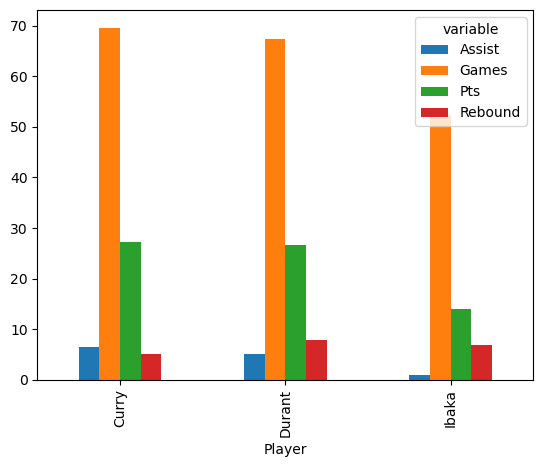

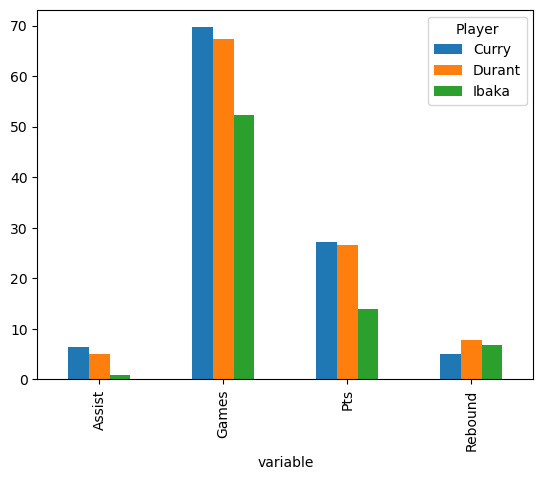

In [63]:
player_stats.unstack().plot.bar()
player_stats.unstack(level = "Player").plot.bar()


## Merging Data
Frequently, we want to perform analysis on data that comes from two or more different sources or are spread across many files. For example, we may be interested in the prices of a company's stock and its earnings but our data might be spread out across many files.
- Different files for different years
- Different files for different companies
- Different files for stock prices and earnings

Depending on our unit of observation, these different situations might require different ways of **merging data** -- that is getting all of the data into a single DataFrame.

The three main ways to merge data in pandas are:
1. `pd.concat([df1, df2,...])`
2. `pd.merge(df1, df2)`
3. `df1.join(df2)`

In [64]:
### Load Datasets Used for Illustration
# from World Development Indicators (WDI). Units trillions of 2010 USD
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
wdi = pd.read_csv(url).set_index(["country", "year"])
wdi.info()

wdi2017 = wdi.xs(2017, level="year")
wdi2017

# Data from https://www.nationmaster.com/country-info/stats/Geography/Land-area/Square-miles
# units -- millions of square miles
sq_miles = pd.Series({
   "United States": 3.8,
   "Canada": 3.8,
   "Germany": 0.137,
   "China": 3.7,
   "Brazil": 3.3
}, name="sq_miles").to_frame()
sq_miles.index.name = "country"



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Canada', 2017) to ('United States', 2000)
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GovExpend    72 non-null     float64
 1   Consumption  72 non-null     float64
 2   Exports      72 non-null     float64
 3   Imports      72 non-null     float64
 4   GDP          72 non-null     float64
dtypes: float64(5)
memory usage: 3.9+ KB


In [65]:
# View datasets so we can compare later
wdi2017

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2.405743,12.019266,2.287071,3.069954,17.348627


In [66]:
# View datasets so we can compare later
sq_miles

,sq_miles
country,
United States,3.800
Canada,3.800
Germany,0.137
China,3.700
Brazil,3.300


### `pd.concat()`
"concat" stands for concatenation. Simply put, concatenating DataFrames entails stacking them on top of eachother or side-by-side. This,however, is done intelligently though as indices must match. The argument `axis` allows user to specify which way Python should stack the DataFrames. 

We show two concatenations below. Which one looks more "tidy?"

In [67]:
# The two dataframes have no columns in behavipr
pd.concat([wdi2017, sq_miles], axis = 0)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,NaN
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,NaN
United States,2.405743,12.019266,2.287071,3.069954,17.348627,NaN
United States,NaN,NaN,NaN,NaN,NaN,3.800
Canada,NaN,NaN,NaN,NaN,NaN,3.800
Germany,NaN,NaN,NaN,NaN,NaN,0.137
China,NaN,NaN,NaN,NaN,NaN,3.700
Brazil,NaN,NaN,NaN,NaN,NaN,3.300


In [68]:
# China and Brazil are missing from wdi2017
pd.concat([wdi2017, sq_miles], axis = 1)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.800
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.137
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,NaN
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.800
China,NaN,NaN,NaN,NaN,NaN,3.700
Brazil,NaN,NaN,NaN,NaN,NaN,3.300


In [69]:
# Can obtain per square mile statistics now! Remember Exports is in trillions and sq_miles is in millions
temp = pd.concat([wdi2017, sq_miles], axis=1)
temp["Exports"] *(1_000_000) / (temp["sq_miles"] )

country
Canada            1.533765e+05
Germany           1.409170e+07
United Kingdom             NaN
United States     6.018607e+05
China                      NaN
Brazil                     NaN
dtype: float64

### `pd.merge()` or `df.merge()`
Brings columns from one DataFrame into another, but instead of just combining them using an index, it uses one or more keys (variables found in both datasets) to combine the data.

### `df.join()`
This is a less general version of merge that is a DataFrames method instead of a function.

Merging & joining are not straightforward concepts, so let's start with some examples. 

In [70]:
pd.merge(wdi2017, sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.800
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.137
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.800


### What do we see?
- China, Brazil, and the UK were excluded. What did those countries have in common (with regards to the data)?
- Besides that, similar to `pd.concat([wdi2017, sq_miles], axis = 1)`

The power of merging is more obvious when we merge on a variable that is not unique.

In [71]:
# load wdi data for 2016 and 2017
wdi2016_17 = wdi.loc[pd.IndexSlice[:, [2016, 2017]],: ]
wdi2016_17

,,GovExpend,Consumption,Exports,Imports,GDP
country,year,,,,,
Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016
Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859
United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241
United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348
Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627


In [72]:
# merge `wdi2016_17` data with `sq_miles`
pd.merge(wdi2016_17, sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.364899,1.058426,0.576394,0.575775,1.814016,3.800
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.800
Germany,0.734014,2.075615,1.844949,1.589495,3.801859,0.137
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.137
United States,2.407981,11.722133,2.219937,2.936004,16.972348,3.800
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.800


### What do we see?
- China, Brazil, and the UK were excluded again.
- We lost the `year` variable. 
- Each country has the `sq_miles`value repeated twice -- once for 2016 and once for 2017

To recover the year, simply reset the index, so that it becomes a column instead. If you want, you can set the index back again using `.set_index()`.

In [73]:
temp = pd.merge(wdi2016_17.reset_index(), sq_miles, on="country").set_index(["country", "year"])
temp

GovExpend  Consumption   Exports   Imports        GDP  \
country       year                                                          
Canada        2016   0.364899     1.058426  0.576394  0.575775   1.814016   
              2017   0.372665     1.095475  0.582831  0.600031   1.868164   
Germany       2016   0.734014     2.075615  1.844949  1.589495   3.801859   
              2017   0.745579     2.112009  1.930563  1.666348   3.883870   
United States 2016   2.407981    11.722133  2.219937  2.936004  16.972348   
              2017   2.405743    12.019266  2.287071  3.069954  17.348627   

                    sq_miles  
country       year            
Canada        2016     3.800  
              2017     3.800  
Germany       2016     0.137  
              2017     0.137  
United States 2016     3.800  
              2017     3.800

In [74]:
print(1_000_000 * temp["Consumption"] / temp["sq_miles"])

country        year
Canada         2016    2.785330e+05
               2017    2.882829e+05
Germany        2016    1.515047e+07
               2017    1.541612e+07
United States  2016    3.084772e+06
               2017    3.162965e+06
dtype: float64


## Multiple Column Merges
What if we have multiple datasets with country-year observations that we want to merge together? Luckily, `pd.merge()` makes this easy. Below, we load another datset that contains the 2000-2017 populations of the folowing countries:
- Canada
- Germany
- United States
- United Kingdom

Then, we merge this new dataframe with `wdi2016_17`

In [75]:
## Loading a dataset on population
# from WDI. Units millions of people
pop_url = "https://datascience.quantecon.org/assets/data/wdi_population.csv"
pop = pd.read_csv(pop_url).set_index(["country", "year"])
pop

Population
country       year            
Canada        2017   36.540268
              2016   36.109487
              2015   35.702908
              2014   35.437435
              2013   35.082954
...                        ...
United States 2004  292.805298
              2003  290.107933
              2002  287.625193
              2001  284.968955
              2000  282.162411

[72 rows x 1 columns]

In [76]:
wdi_pop = pd.merge(wdi2016_17, pop, on=["country", "year"])
wdi_pop

,,GovExpend,Consumption,Exports,Imports,GDP,Population
country,year,,,,,,
Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,36.109487
Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859,82.348669
United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241,65.595565
United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348,323.071342
Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,36.540268
Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870,82.657002
United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704,66.058859
United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627,325.147121


### What do we see?
- China, Brazil, and the UK were excluded again.
- We didn't lose the the `year` variable even though it was the index because we it was a variable we merged on! 
- Population matches as we would expect.


Now we can use this to dataset to get per-capita measurements!

In [77]:
1_000_000 * wdi_pop["GDP"] / wdi_pop["Population"]

country         year
Canada          2016    50236.535070
Germany         2016    46167.830784
United Kingdom  2016    42201.641425
United States   2016    52534.365284
Canada          2017    51126.184351
Germany         2017    46987.787982
United Kingdom  2017    42669.576512
United States   2017    53356.236236
dtype: float64

## Other `merge` Arguments
`pd.merge()` has optional arguments we have not discussed. To use these, you should understand the concept of `left` and `right`. Namely, the DataFrame that serves as the first argument in `merge()` is the `left` DataFrame. The second DataFrame argument is the `right` DataFrame. 

**Example:** `pd.merge(df_left, df_right, on = variable)`.


### `on`, 
This is technically an optional argument. If it is not specified, all column names (**not indices!**) that appear in both `left` and `right` DataFrames will be used. 


In [78]:
# This will not work if we do not .reset_index() 
pd.merge(wdi2016_17.reset_index(), pop.reset_index()).set_index(["country", "year"])


,,GovExpend,Consumption,Exports,Imports,GDP,Population
country,year,,,,,,
Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,36.109487
Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859,82.348669
United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241,65.595565
United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348,323.071342
Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,36.540268
Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870,82.657002
United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704,66.058859
United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627,325.147121


### `left_on` and `right_on`
Use this when the columns you want to match on are called something different.

In [79]:
# define DataFraem with different index name
cont_df = pd.Series({"Canada":"North America", 
                  "Germany":"Europe",
                  "China":"Asia",
                  "Brazil":"South America",
                  "Kenya":"Africa"}).to_frame()
cont_df.index.name = "country or something else"
cont_df = cont_df.rename(columns = {0:"Continent"})
cont_df

,Continent
country or something else,
Canada,North America
Germany,Europe
China,Asia
Brazil,South America
Kenya,Africa


In [80]:
# Reset index on the variable we want to keep as they will be identical
pd.merge(sq_miles.reset_index(), cont_df, left_on = "country", right_on = "country or something else")

,country,sq_miles,Continent
0,Canada,3.800,North America
1,Germany,0.137,Europe
2,China,3.700,Asia
3,Brazil,3.300,South America


### `left_index` and `right_index`
If we want to merge on the index on our `left` or `right` DataFrames, we can set  `left_index` or  `right_index` equal to `True` respectively. 

In [81]:
pd.merge(sq_miles.reset_index(), cont_df, left_on = "country", right_index = True)

,country,sq_miles,Continent
1,Canada,3.800,North America
2,Germany,0.137,Europe
3,China,3.700,Asia
4,Brazil,3.300,South America


In [82]:
pd.merge(wdi2017, cont_df, left_index = True, right_index = True)

,GovExpend,Consumption,Exports,Imports,GDP,Continent
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,North America
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,Europe


### `how` 
This far, only keys (countries and years) that have been in both the `left` and `right` dataset appear in the merged dataset. This behavior is caused by the default value of `how`. What if we want these keys to stick around even if they don't exist in the other dataset?

This is one of the two most difficult Pandas concepts we will cover and requires keeping track of which DataFrame is `left` and which one is `right`.  

`how` can take four arguments:
- "left"
- "right"
- "inner"
- "outer"

Below, is a helpful image from [QuantEcon](https://datascience.quantecon.org/pandas/merge.html) that shows what each argument does. Can you guess which is the default one?

<img src="https://datascience.quantecon.org/_images/merge_venns.png" alt="Alternative text" />


### Argument descriptions
- "left" uses all keys from `left`, regardless of their presence in `right`
- "right" uses all keys from `right`, regardless of their presence in `left`
- "inner" uses only keys that appear in both `left` and `right`
- "outer" uses all keys from both `left` and `right`

Let's see some example to solidify our understanding. 

In [83]:
# left
pd.merge(cont_df, wdi2017, left_index = True, right_index = True, how = "left")

,Continent,GovExpend,Consumption,Exports,Imports,GDP
country or something else,,,,,,
Canada,North America,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,Europe,0.745579,2.112009,1.930563,1.666348,3.883870
China,Asia,NaN,NaN,NaN,NaN,NaN
Brazil,South America,NaN,NaN,NaN,NaN,NaN
Kenya,Africa,NaN,NaN,NaN,NaN,NaN


In [84]:
# right
pd.merge(cont_df, wdi2017, left_index = True, right_index = True, how = "right")

,Continent,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,,
Canada,North America,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,Europe,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,NaN,0.549538,1.809154,0.862629,0.933145,2.818704
United States,NaN,2.405743,12.019266,2.287071,3.069954,17.348627


In [85]:
# inner
pd.merge(cont_df, wdi2017, left_index = True, right_index = True, how = "inner")

,Continent,GovExpend,Consumption,Exports,Imports,GDP
Canada,North America,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,Europe,0.745579,2.112009,1.930563,1.666348,3.883870


In [86]:
# outer
pd.merge(cont_df, wdi2017, left_index = True, right_index = True, how = "outer")

,Continent,GovExpend,Consumption,Exports,Imports,GDP
Brazil,South America,NaN,NaN,NaN,NaN,NaN
Canada,North America,0.372665,1.095475,0.582831,0.600031,1.868164
China,Asia,NaN,NaN,NaN,NaN,NaN
Germany,Europe,0.745579,2.112009,1.930563,1.666348,3.883870
Kenya,Africa,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,0.549538,1.809154,0.862629,0.933145,2.818704
United States,NaN,2.405743,12.019266,2.287071,3.069954,17.348627


## Aggregation with GroupBy
Frequently, we want to get aggregate statistics (likes averages, modes, and medians) on a group level. For instance, we might want ot use data on individuals' heights and ages to see how average height varies by age. 

`.groupby()` is an essential tool for such aggregation and is probably the most difficult Pandas concept we will learn. Using `.groupby()`, we can divide our data into groups and use aggregators to get statistics on the group-level.

## Three Steps
This process can broken down into three steps:
- **Split** the data into groups. These groups will be determined by the values of one or more columns.
- For each group, **apply** the same function or process (e.g. mean, median, etc.)
- Take the output of that function or process for each group and **combine** them into a single DataFrame where group identifiers serve as the index. 

To begin, we will demonstrate `.groupby()` with a toy example

In [87]:

df = pd.DataFrame({
    "A" : [1, 1, 1, 2, 2, 2, 2, 1],
    "B" : ["Green", "Red", "Green", "Green", "Blue", "Red", "Green", "Red"],
    "C":  [1.0, 2.0, 3.0, math.nan, 5, math.nan, 2.2, 3.4],
    "D" :  [1, 3, 5, 7, 5, 3, 1, 3]
})
df

,A,B,C,D
0,1,Green,1.0,1
1,1,Red,2.0,3
2,1,Green,3.0,5
3,2,Green,NaN,7
4,2,Blue,5.0,5
5,2,Red,NaN,3
6,2,Green,2.2,1
7,1,Red,3.4,3


In [88]:
# First group by a
gbA = df.groupby("A")
type(gbA)

pandas.core.groupby.generic.DataFrameGroupBy

### `.get_group()`
Note the type is a DataFrameGroupBy. This type has a method `.get_group()` that allows us to view keys by supplying it the key of the group we want to see. See if you can guess what the code will display before we run it.

In [89]:
(gbA.get_group(1))

,A,B,C,D
0,1,Green,1.0,1
1,1,Red,2.0,3
2,1,Green,3.0,5
7,1,Red,3.4,3


In [90]:
(gbA.get_group(2))

,A,B,C,D
3,2,Green,NaN,7
4,2,Blue,5.0,5
5,2,Red,NaN,3
6,2,Green,2.2,1


### Multiple Column GroupBy
Much like we can merge two DataFrames on multiple columns, we can group a DataFrame by multiple columns.

In [91]:
gbAB = df.groupby(["A", "B"])

In [92]:
# We can check which groups exist and which indices can be found in each group
gbAB.groups

{(1, 'Green'): [0, 2], (1, 'Red'): [1, 7], (2, 'Blue'): [4], (2, 'Green'): [3, 6], (2, 'Red'): [5]}

In [93]:
# Indices are now tuples
gbAB.get_group((1, "Green"))

,A,B,C,D
0,1,Green,1.0,1
2,1,Green,3.0,5


In [94]:
gbAB.get_group((2, "Blue"))

,A,B,C,D
4,2,Blue,5.0,5


## Aggregators
Once we have a GroupBy object, we have completed the first step of splitting the data into two groups. We can then apply aggregator methods to our data set which simultaneously applies the functions to each groups and combines the results into a DataFrame. 

Looking at the below, how did the `.sum()` aggregator deal with the `NaN` values? 
How did the `.count()` function deal with with NaNs values?

In [95]:
# Print original df for comparison
df

,A,B,C,D
0,1,Green,1.0,1
1,1,Red,2.0,3
2,1,Green,3.0,5
3,2,Green,NaN,7
4,2,Blue,5.0,5
5,2,Red,NaN,3
6,2,Green,2.2,1
7,1,Red,3.4,3


In [96]:
# Sum all columns (not indices!)
gbAB.sum()

C  D
A B            
1 Green  4.0  6
  Red    5.4  6
2 Blue   5.0  5
  Green  2.2  8
  Red    0.0  3

In [97]:
# Now we how many observations or rows are in each group
gbAB.count()

C  D
A B          
1 Green  2  2
  Red    2  2
2 Blue   1  1
  Green  1  2
  Red    0  1

### Custom Aggregators for GroupBy
Custom Aggregators also work on GroupBy objects. Simply define a function that takes a DataFrame or Series as an input and returns a Series or a single value. As before, we feed this function to the `.agg()` method.  Below, we define a function that returns the number of missing data points in each column. 

In [98]:
# Define function that takes Data Frame
def num_missing(df):
    return df.isnull().sum()

In [99]:
# .agg(num_missing) applies num_missing to each group individually then combines the results
gbAB.agg(num_missing)


C  D
A B          
1 Green  0  0
  Red    0  0
2 Blue   0  0
  Green  1  0
  Red    1  0

### Custom Transforms for GroupBy
We can also apply custom transforms to GroupBy objects by using the `.apply()` method

In [100]:
# Define function that returns rows where column B is equal to "Green" of a Data Frame
def find_green_rows(df):
    return df.loc[df["B"] == "Green", :]

In [101]:
gbAB.apply(find_green_rows)


A      B    C  D
A B                        
1 Green 0  1  Green  1.0  1
        2  1  Green  3.0  5
2 Green 3  2  Green  NaN  7
        6  2  Green  2.2  1

In [102]:
# Note the index changed -- what happened? 
gbAB.apply(find_green_rows).index

MultiIndex([(1, 'Green', 0),
            (1, 'Green', 2),
            (2, 'Green', 3),
            (2, 'Green', 6)],
           names=['A', 'B', None])

## Working with Date & Time Data
Sometimes, we will have a date or date and time data that we want to work with. Sometimes, that entails extracting some component of the date (e.g. month or day of the week) to save as its own variable. Other times, our dates may be stored as strings or a series of numbers, but we want them to be handled as dates (e.g. what date is one day from a given date, was the day before a Monday, how much time elapsed between two datetimes, etc.)

`datetime` objects and their associated methods help us deal with all of these scenarios and more!

### Parsing Dates from Strings
First, we demonstrate how to convert a string containing a date into a `datetime` object. Like other type conversions, we simply use `pd.to_datetime`. It is important that the string is formatted a certain way, so that its contents can be interpreted as a `datetime`.

After running the cell below, observe what happens. What happens when we do not provide a time?

In [103]:
# Convert date string to datetime
christmas_str = "2017-12-25"
christmas_date = pd.to_datetime(christmas_str)
christmas_date

Timestamp('2017-12-25 00:00:00')

In [104]:
# Convert date and time string to datetime
christmas_time_str = "2017-12-25, 13:34:34"
christmas_time = pd.to_datetime(christmas_time_str)
christmas_time

Timestamp('2017-12-25 13:34:34')

In [105]:
# Convert list of dates
kwanza_dates = pd.to_datetime(["2023-12-26", "2023-12-27", "2023-12-28", "2023-12-29", "2023-12-30", "2023-12-31", "2024-01-01"])
kwanza_dates

DatetimeIndex(['2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31', '2024-01-01'],
              dtype='datetime64[ns]', freq=None)

### Flexible Date Formats
As you can see in the cell directly below, `pd.to_datetime` can parse many date formats. Uncomment the cell below that one, however, and you will see it cannot handle everything.

In [106]:
for date in ["December 25, 2017", "Dec. 25, 2017",
             "Monday, Dec. 25, 2017", "25 Dec. 2017", "25th Dec. 2017"]:
    print("pandas interprets {} as {}".format(date, pd.to_datetime(date)))

pandas interprets December 25, 2017 as 2017-12-25 00:00:00
pandas interprets Dec. 25, 2017 as 2017-12-25 00:00:00
pandas interprets Monday, Dec. 25, 2017 as 2017-12-25 00:00:00
pandas interprets 25 Dec. 2017 as 2017-12-25 00:00:00
pandas interprets 25th Dec. 2017 as 2017-12-25 00:00:00


In [107]:
# We create a very weird date time string
weird_time = "Second:45, Minute:32, Hour:21, Day:3, Month:3, Year:2032"

In [108]:
# uncomment below and see it fail
#pd.to_datetime(weird_time)

### Specify the Format for String Conversion
Luckily, we can still deal with dates that are formatted like `weird_time` by communicating the pattern to `pd.to_datetime()` using another string. 

Below, we define such a string and feed it to the argument `format`. Can you figure out what the % symbols follows by a letter below signify?

In [109]:
weird_pattern_str = "Second:%S, Minute:%M, Hour:%H, Day:%d, Month:%m, Year:%Y"
pd.to_datetime(weird_time, format = weird_pattern_str)


Timestamp('2032-03-03 21:32:45')

### Format `datetime` as string
We may also want to format `datetime` as a string or extract a certain value from the `datetime` and turn it into a number. We can t dates as strings using the `.strftime()` method.

Run the cell below and observe the output. What do you thing `%B` does? How about `%e`? 

[here](https://strftime.org/) is a usefule reference for some of the possible `.strftime()` formatting options.


In [110]:
string = "Kwanza starts on " + kwanza_dates[0].strftime("%B %d") + "th and ends on " + kwanza_dates[len(kwanza_dates)-1].strftime("%B%e") + "st."
string

'Kwanza starts on December 26th and ends on January 1st.'

### Date Properties
Sometimes, we may have `datetime` variables and we want to get numeric values (e.g. the hour, day of the month, year, etc.). Below, we demonstrate how to access some of these values.

In [111]:
print(pd.to_datetime("2012-11-15").year)
print(pd.to_datetime("2023-07-25").dayofweek)
print(pd.to_datetime("2012-11-15").day)

2012
1
15


## Dates as Indices
In a previous example, we have observations that were country-year and country-year pairs defined our observations uniquely. Using a `DateTimeIndex` instead of a numeric index give us access to many powerful tools. Below, we load data on daily BitCoin to US dollar (USD) exchange rates from 2014 onwards. 

Note how our index is a `DateTimeIndex`! 

In [112]:
btc_usd = quandl.get("BCHARTS/BITSTAMPUSD", start_date = pd.to_datetime("01-01-2014"))
btc_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2719 entries, 2014-01-01 to 2021-06-20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2719 non-null   float64
 1   High               2719 non-null   float64
 2   Low                2719 non-null   float64
 3   Close              2719 non-null   float64
 4   Volume (BTC)       2719 non-null   float64
 5   Volume (Currency)  2719 non-null   float64
 6   Weighted Price     2719 non-null   float64
dtypes: float64(7)
memory usage: 169.9 KB


In [113]:
btc_usd.head(3)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-01,732.00,757.99,729.01,754.90,7907.637862,5.894782e+06,745.454163
2014-01-02,751.88,798.70,742.50,784.19,15134.169007,1.163316e+07,768.668880
2014-01-03,784.19,818.99,767.62,809.40,14860.262828,1.186689e+07,798.565468


### Flexibilie Indexing Syntax
Normally, we can reference a row only by specifically referencing its index. If we want to select many indices, we can use slices or other collections to select them. 

With dates, however, we have a different way to select many rows at once that leverages the same flexibility of `pd.to_datetime()`. For example, below we select all prices in 2019 with a single command.

In [114]:
btc_usd.loc["2019"] # Select BTC prices in 2019

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2019-01-01,3693.85,3845.46,3629.66,3823.44,5149.606277,1.910945e+07,3710.856036
2019-01-02,3825.41,3918.67,3770.00,3885.87,5534.469515,2.120409e+07,3831.278282
2019-01-03,3890.27,3893.40,3760.00,3787.81,4803.246109,1.833872e+07,3817.985479
2019-01-04,3785.64,3850.33,3732.38,3817.71,7452.058944,2.822004e+07,3786.878886
2019-01-05,3822.00,3887.09,3780.00,3791.84,3656.375314,1.402088e+07,3834.639014
...,...,...,...,...,...,...,...
2019-12-27,7195.17,7255.37,7052.00,7246.00,4024.570866,2.888485e+07,7177.124566
2019-12-28,7247.70,7349.65,7231.00,7296.24,1579.702726,1.152855e+07,7297.924676
2019-12-29,7297.43,7524.46,7274.43,7385.54,2583.851342,1.912018e+07,7399.875693


In [115]:
# select end of month price data 
btc_usd.loc[btc_usd.index.is_month_end]

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-31,799.99,809.98,791.00,803.00,7728.160056,6.196006e+06,801.743969
2014-02-28,584.70,591.39,541.00,551.89,22634.324987,1.277475e+07,564.397233
2014-03-31,460.00,486.70,438.00,454.83,20986.650960,9.549170e+06,455.011630
2014-04-30,448.00,453.99,433.08,448.85,10757.364822,4.781744e+06,444.508850
2014-05-31,621.00,628.50,611.00,627.80,9696.707475,6.023689e+06,621.209709
...,...,...,...,...,...,...,...
2021-01-31,34300.19,34380.21,32193.70,33141.38,4750.123156,1.581776e+08,33299.680658
2021-02-28,46142.10,46659.88,43021.00,45240.96,6668.918114,2.971107e+08,44551.563934
2021-03-31,58767.75,59816.17,56713.45,58782.58,4595.252521,2.694676e+08,58640.426760


In [116]:
# Select all prices in October 2018
btc_usd.loc["October 2018"]

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2018-10-01,6597.79,6638.15,6477.57,6571.20,4796.040132,3.145826e+07,6559.215753
2018-10-02,6569.32,6597.00,6447.28,6500.00,4116.133424,2.686436e+07,6526.601729
2018-10-03,6500.00,6510.00,6396.34,6456.77,4774.763282,3.076059e+07,6442.327847
2018-10-04,6454.81,6604.89,6450.58,6547.56,3832.700489,2.510551e+07,6550.343870
2018-10-05,6548.83,6641.35,6510.00,6582.12,3807.269282,2.495233e+07,6553.864519
2018-10-06,6582.11,6595.69,6526.28,6544.08,2022.780759,1.325423e+07,6552.479596
2018-10-07,6547.93,6600.00,6493.92,6577.63,2455.656591,1.609350e+07,6553.643005
2018-10-08,6574.15,6656.63,6541.06,6604.75,4079.044249,2.689673e+07,6593.879882
2018-10-09,6604.76,6623.14,6553.13,6588.80,2254.950270,1.484894e+07,6585.039783


In [117]:
# Can specify a range od ates
btc_usd.loc["October 2018":" December 2019"]

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2018-10-01,6597.79,6638.15,6477.57,6571.20,4796.040132,3.145826e+07,6559.215753
2018-10-02,6569.32,6597.00,6447.28,6500.00,4116.133424,2.686436e+07,6526.601729
2018-10-03,6500.00,6510.00,6396.34,6456.77,4774.763282,3.076059e+07,6442.327847
2018-10-04,6454.81,6604.89,6450.58,6547.56,3832.700489,2.510551e+07,6550.343870
2018-10-05,6548.83,6641.35,6510.00,6582.12,3807.269282,2.495233e+07,6553.864519
...,...,...,...,...,...,...,...
2019-12-27,7195.17,7255.37,7052.00,7246.00,4024.570866,2.888485e+07,7177.124566
2019-12-28,7247.70,7349.65,7231.00,7296.24,1579.702726,1.152855e+07,7297.924676
2019-12-29,7297.43,7524.46,7274.43,7385.54,2583.851342,1.912018e+07,7399.875693


### Date Index Properties
Earlier, we demonstrated how to extract individual numerical elements from a date (year, day of the week, etc.) We can do the same thing with a `DateTimeIndex` object.  These operations return an Int64Index object. If we are operating on a column of `DateTime` objects, then we have to add an extra `.dt` betweent the object and the commands.

In [118]:
# Index example
print(type(btc_usd.index.year))
btc_usd.index.year

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=2719)

In [119]:
btc_date_column = btc_usd.reset_index()
btc_date_column["Date"].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2714    2021
2715    2021
2716    2021
2717    2021
2718    2021
Name: Date, Length: 2719, dtype: int64

## Leads and Lags Using `df.shift()`
When dealing with what's known as time series data, we sometimes want to compare data from one datetime with another datetime. For example, we might be interested in calculating Bitcoin's price change from one day to the next. To do this, we need to associate prices from one day (e.g May 1st, 2015) with prices from the next day (e.g. May 2nd, 2015). 

We can do this easily using `df.shift(n)` where `n=1`. Think about why the first rows is all `NaN`.

In [120]:
# Before df.shift()
btc_usd

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-01,732.00,757.99,729.01,754.90,7907.637862,5.894782e+06,745.454163
2014-01-02,751.88,798.70,742.50,784.19,15134.169007,1.163316e+07,768.668880
2014-01-03,784.19,818.99,767.62,809.40,14860.262828,1.186689e+07,798.565468
2014-01-04,808.24,830.00,790.20,828.79,10990.142948,8.946716e+06,814.067283
2014-01-05,828.79,948.00,826.07,905.00,24075.949596,2.123077e+07,881.824647
...,...,...,...,...,...,...,...
2021-06-16,40166.93,40506.59,38095.41,38353.99,4008.512964,1.574020e+08,39266.920444
2021-06-17,38361.38,39553.05,37350.00,38097.68,3569.252616,1.372355e+08,38449.364210
2021-06-18,38110.25,38208.68,35143.68,35840.00,4240.404867,1.560566e+08,36802.295855


In [121]:
# after df.shift()
btc_usd.shift()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,732.00,757.99,729.01,754.90,7907.637862,5.894782e+06,745.454163
2014-01-03,751.88,798.70,742.50,784.19,15134.169007,1.163316e+07,768.668880
2014-01-04,784.19,818.99,767.62,809.40,14860.262828,1.186689e+07,798.565468
2014-01-05,808.24,830.00,790.20,828.79,10990.142948,8.946716e+06,814.067283
...,...,...,...,...,...,...,...
2021-06-16,40544.19,41341.57,39526.47,40171.47,4078.801974,1.640736e+08,40225.918037
2021-06-17,40166.93,40506.59,38095.41,38353.99,4008.512964,1.574020e+08,39266.920444
2021-06-18,38361.38,39553.05,37350.00,38097.68,3569.252616,1.372355e+08,38449.364210


Now, we can take advantage of Python's indexing to calculate the percentange change in all of the column variables from one day to the next! 

In [122]:
((btc_usd - btc_usd.shift()) / btc_usd.shift()).head(3)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,0.027158,0.053708,0.018505,0.038800,0.913867,0.973468,0.031142
2014-01-03,0.042972,0.025404,0.033832,0.032148,-0.018099,0.020092,0.038894


### Shifting by Different Amounts
If we wanted two day price changes we can chose `n=2`. First, let's see what shifting by 2 does. Why are the top two columns now all `NaN`?

In [123]:
btc_usd.shift(2).head()


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,732.00,757.99,729.01,754.90,7907.637862,5.894782e+06,745.454163
2014-01-04,751.88,798.70,742.50,784.19,15134.169007,1.163316e+07,768.668880
2014-01-05,784.19,818.99,767.62,809.40,14860.262828,1.186689e+07,798.565468


So far positive numbers have been giving us what are called **lags**. That is, we have been creating associations between a date and data from an **earlier** date. **Leads** are the opposite. In this case, we associate a date with data from a **later** date. To get leads, we use negative numbers.

Below, we print the last three rows of `btc_usd.shift(-2)`. What do you expect to see?

In [124]:
btc_usd.shift(-2).tail(3)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2021-06-18,35494.7,36125.0,33337.0,35675.47,3865.408811,1.344830e+08,34791.393581
2021-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
